In [1]:
loadlibrary <- function(x){
  for(i in x){
    if (!require(i,character.only = TRUE)) {
      install.packages(i, dep=TRUE)
    } else{
      library(i, character.only = T)
    }
  }
}

In [2]:
pacotes <- c("IntroCompFinR", "tidyquant", "dplyr", "tidyr")
options(warn = -1)
loadlibrary(pacotes)

Loading required package: IntroCompFinR

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: tidyquant

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics


Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

== Need to Learn tidyquant? ====================================================
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with ti

In [12]:
#Retorno das ações entre 2014 e 2019
ativos <- c("TRPL4", "TAEE11", "COGN3", "ITSA4", "LREN3")
trpl_ret <- c(0.6202,0.1148,0.4727,0.0828,0.2451,0.3894)
abev_ret <- c(-0.0101,0.1421,-0.0413,0.3390,-0.2554,0.2442)
itsa_ret <- c(0.2110,-0.1381,0.4477,0.3907,0.3310,0.3503)
enat_ret <- c(-0.2520,-0.1464,-0.0524,1.0703,-0.0024,0.9465)
seer_ret <- c(0.2765,-0.7195,1.4738,0.7105,-0.4898,0.9836)
oibr_ret <- c(-0.7472,-0.7372,0.095,0.3827,-0.5387,-0.3120)
tcsa_ret <- c(-0.5438,-0.2432,-0.0446,-0.0374,-0.2961,0.2661)
petr_ret <- c(-0.3783,-0.2815,1.2132,0.0829,0.4591,0.3687)
vale_ret <- c(-0.3309,-0.3573,0.9826,0.6256,0.3111,0.0685)
itub_ret <- c(0.2448,-0.1094,0.4903,0.2964,0.3241,0.1198)
b3sa_ret <- c(-0.0868,0.2198,0.5525,0.4049,0.2079,0.6326)
mglu_ret <- c(0.0380,-0.6967,5.0378,5.0921,1.2639,1.1219)
vvar_ret <- c(-0.0646,-0.7955,1.4861,1.2123-0.4457,1.5444)
lren_ret <- c(0.2784,0.1529,0.4116,0.7283,0.2019,0.4905)
rent_ret <- c(0.0812,-0.2848,0.4142,1.0540,0.3613,0.6875)
suzb_ret <- c(0.2191,0.7291,-0.2235,0.3650,1.0473,0.0534)
egie_ret <- c(-0.0139,0.0628,0.0705,0.0931,0.2998,0.5920)
enbr_ret <- c(-0.0906,0.3746,0.2537,0.0565,0.0930,0.5843)
flry_ret <- c(0.0000,1.3794,0.6891,-0.3099,0.6188,0.6297)
bbdc_ret <- c(0.2567,-0.2925,0.7608,0.3452,0.2924,0.1859)
hype_ret <- c(-0.0577,0.3398,0.2245,0.4773,-0.1193,0.2177)
pssa_ret <- c(-0.0259,-0.0287,0.4046,0.5575,0.2463)
wizs_ret <- c(-0.2909,0.4966,-0.1054,-0.3719,1.3034)
bpan_ret <- c(-0.2922,-0.2065,0.4634,0.0722,4.4923)
abcb_ret <- c(-0.2794,0.7739,0.3336,0.0564,0.2682)
caml_ret <- c(0.0000,0.0000,0.0000,-0.1144,-0.0799,0.3039)
mdia_ret <- c(-0.2399,0.7503,0.3726,-0.1718,-0.1086)
bees_ret <- c(-0.1423,3.9837,0.5007,0.4186,0.2244,0.4578)
brsr_ret <- c(0.0632,-0.2354,0.3301,1.3937,-0.1072,0.1269)
prio_ret <- c(-0.4923,-0.4674,0.7780,2.7696,0.2124,2.3735)
taee_ret <- c(0.0357,-0.1184,0.2471,0.0304,0.1734,0.2578)
cdi_ret <- c(0.1077,0.1325,0.1394,0.0990,0.0640,0.0594)
wti_ret <- c(-0.3106,0.4365,0.1155,-0.2445,0.3624)
gold_ret <- c(-0.0176,-0.1038,0.0843,0.1313,-0.0156,0.1833)
mult_ret <- c(-0.0333,-0.1668,0.5842,0.2331,0.0219,0.3745)
odpv_ret <- c(0.0493,-0.0081,0.3686,0.3128,-0.1105,0.2664)
bitc_ret <- c(-0.5215,0.9977,0.9050,12.8961,-0.6932,0.9619)
goog_ret <- c(0.0692,1.1769,-0.1461,0.3265,0.1626,0.3410)
aapl_ret <- c(0.5641,0.4082,-0.0730,0.4734,0.0861,0.9635)
amzn_ret <- c(-0.1246,2.2223,-0.0616,0.5556,0.5015,0.3061)
doll_ret <- c(0.1249,0.4902,-0.1627,0.0178,0.1712,0.0357)
wege_ret <- c(0.2734,-0.0221,0.0431,0.5656,-0.0636,0.9671)
whrl_ret <- c(0.1859,-0.3655,0.3292,0.7930,0.0551,1.1939)
brml_ret <- c(-0.0056,-0.3035,0.4174,0.2423,0.0412,0.4767)
cple_ret <- c(0.2239,-0.3086,0.3057,0.2083,0.5085,1.2944)
sapr_ret <- c(-0.0839,-0.3887,2.4695,0.1563,-0.0316,1.0743)
cyre_ret <- c(-0.2111,-0.2895,0.4247,0.3118,0.2615,1.0278)
grnd_ret <- c(-0.1076,0.1645,0.2220,0.7012,-0.0975,0.5555)
jhsf_ret <- c(-0.4430,-0.4619,0.2160,0.3310,0.1086,2.9732)
shul_ret <- c(-0.4548,-0.2066,0.1149,0.7156,0.4633,0.4941)
cogn_ret <- c(0.6231,-0.3705,0.4365,0.4316,-0.5149,0.2791)

In [68]:
acoes <- c("TRPL4.SA","ITUB4.SA", "GRND3.SA", "ABCB4.SA", "WEGE3.SA")
data_inicio <- "2014-01-01"
data_fim <- "2020-01-01"
ret_a <- tq_get(acoes, from = data_inicio, to = data_fim) %>%
  group_by(symbol) %>%
  tq_transmute(select = close, mutate_fun= periodReturn, period = "yearly") %>%
  mutate(year = year(date)) %>%
  group_by(year,symbol) %>%
  summarise(yearly.returns) %>%
  spread(key = "symbol", value = "yearly.returns")
ret_d <- tq_get(acoes, from = "2014-01-01", to = "2020-07-21") %>%
  group_by(symbol) %>%
  tq_transmute(select = close, mutate_fun = periodReturn, period = "daily")
retornos_sep <- ret_d %>%
  spread(key = "symbol", value = "daily.returns")

`summarise()` regrouping output by 'year' (override with `.groups` argument)



In [69]:
retornos <- cbind(ret_a[,2:ncol(ret_a)])
retornos

ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.134452142,-0.14044896,0.20749196,0.61053374,0.30428015
-0.343140069,0.10065294,-0.16291952,0.10121282,-0.01967470
1.014217974,0.04394361,0.41416629,0.42093006,0.03679130
0.254843625,0.61831570,0.25790213,0.03129329,0.55548473
-0.007932949,-0.13532483,0.25058566,0.03408072,-0.05425365
0.204819337,0.49756098,0.04507037,0.30557965,0.97605462


In [70]:
retorno_medio <- matrix(0, ncol = 1, nrow = ncol(retornos))
for(i in 1:ncol(retornos)){
    retorno_medio[i,] <- rbind(mean(retornos[,i], na.rm = T))
}
rownames(retorno_medio) <- sort(acoes)
retorno_medio

ABCB4.SA,0.2095433
GRND3.SA,0.1641166
ITUB4.SA,0.1687161
TRPL4.SA,0.2506050
WEGE3.SA,0.2997804


In [71]:
covar <- cov(ret_a[,2:ncol(ret_a)], use = "na.or.complete")
covar

,ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
ABCB4.SA,0.201593855,0.009073383,0.072940978,0.04589793,0.009996351
GRND3.SA,0.009073383,0.103675301,-0.009099072,-0.02741065,0.099632096
ITUB4.SA,0.072940978,-0.009099072,0.040335318,0.01224459,-0.009646266
TRPL4.SA,0.045897933,-0.027410649,0.012244592,0.05577599,0.012461201
WEGE3.SA,0.009996351,0.099632096,-0.009646266,0.01246120,0.163861341


In [72]:
matriz_cor <- cor(retornos_sep[2:ncol(retornos_sep)], use = "na.or.complete")
matriz_cor

,ABCB4.SA,GRND3.SA,ITUB4.SA,TRPL4.SA,WEGE3.SA
ABCB4.SA,1.0000000,0.3656255,0.5603123,0.3208555,0.3062836
GRND3.SA,0.3656255,1.0000000,0.4075090,0.3227941,0.3081359
ITUB4.SA,0.5603123,0.4075090,1.0000000,0.3939710,0.3774051
TRPL4.SA,0.3208555,0.3227941,0.3939710,1.0000000,0.2240696
WEGE3.SA,0.3062836,0.3081359,0.3774051,0.2240696,1.0000000


In [73]:
tx_livre_risco <- 0.0225

In [74]:
short_selling <- F

In [75]:
carteira_eficiente <- tangency.portfolio(retorno_medio, covar, tx_livre_risco, shorts = short_selling)

carteira_eficiente

Call:
tangency.portfolio(er = retorno_medio, cov.mat = covar, risk.free = tx_livre_risco, 
    shorts = short_selling)

Portfolio expected return:     0.2053346 
Portfolio standard deviation:  0.1312983 
Portfolio weights:
[1] 0.0000 0.2742 0.2632 0.4626 0.0000

In [76]:
sharpe <- (carteira_eficiente$er-tx_livre_risco)/carteira_eficiente$sd
sharpe

[1] 1.392513

In [77]:
carteira_min_risco <- globalMin.portfolio(retorno_medio, covar, shorts = short_selling)

carteira_min_risco

Call:
globalMin.portfolio(er = retorno_medio, cov.mat = covar, shorts = short_selling)

Portfolio expected return:     0.1963606 
Portfolio standard deviation:  0.1280355 
Portfolio weights:
[1] 0.0000 0.2834 0.3630 0.3535 0.0000

In [78]:
npor <- 100
fronteira_eficiente <- efficient.frontier(retorno_medio, covar, npor, shorts = short_selling)

fronteira_eficiente

attributes(fronteira_eficiente)

Call:
efficient.frontier(er = retorno_medio, cov.mat = covar, nport = npor, 
    shorts = short_selling)

Frontier portfolios' expected returns and standard deviations
   port 1 port 2 port 3 port 4 port 5 port 6 port 7 port 8 port 9 port 10
ER 0.1964 0.1974 0.1984 0.1995 0.2005 0.2016 0.2026 0.2037 0.2047  0.2058
SD 0.1280 0.1281 0.1282 0.1284 0.1287 0.1292 0.1296 0.1302 0.1309  0.1316
   port 11 port 12 port 13 port 14 port 15 port 16 port 17 port 18 port 19
ER  0.2068  0.2079  0.2089  0.2099  0.2110  0.2120  0.2131  0.2141  0.2152
SD  0.1324  0.1333  0.1343  0.1354  0.1365  0.1376  0.1388  0.1400  0.1412
   port 20 port 21 port 22 port 23 port 24 port 25 port 26 port 27 port 28
ER  0.2162  0.2173  0.2183  0.2193  0.2204  0.2214  0.2225  0.2235  0.2246
SD  0.1424  0.1436  0.1449  0.1461  0.1474  0.1487  0.1500  0.1514  0.1527
   port 29 port 30 port 31 port 32 port 33 port 34 port 35 port 36 port 37
ER  0.2256  0.2267  0.2277  0.2287  0.2298  0.2308  0.2319  0.2329  0.2340
SD  0.1541

$names
[1] "call"    "er"      "sd"      "weights"

$class
[1] "Markowitz"

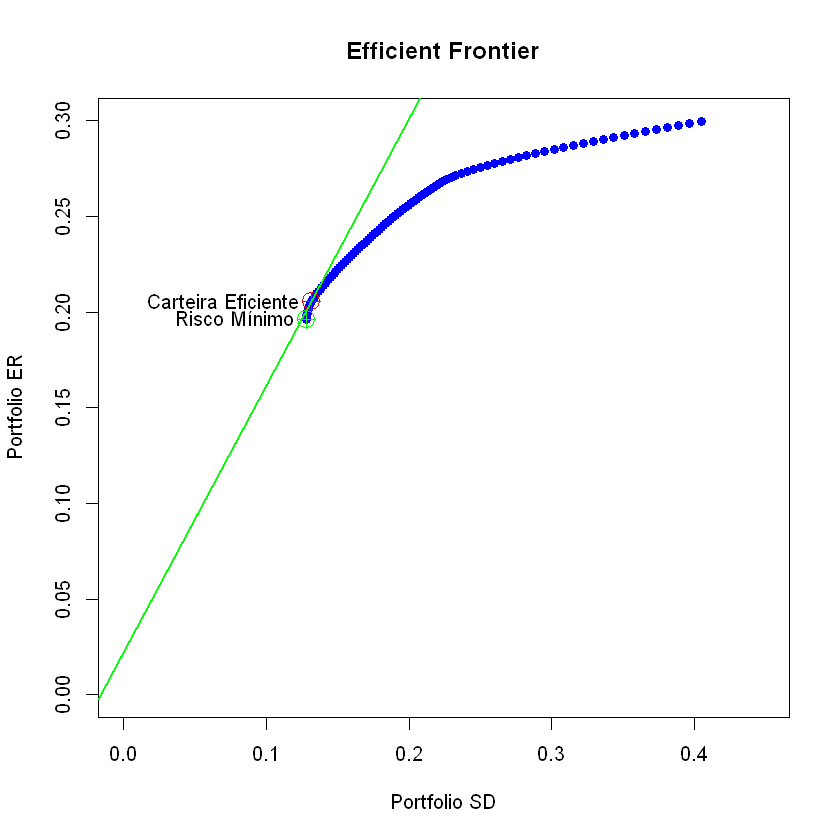

In [79]:
plot(fronteira_eficiente, plot.asset = TRUE,
     col = ifelse(fronteira_eficiente$er == carteira_eficiente$er,"red",
                  "blue"), pch = 16)

points(carteira_min_risco$sd, carteira_min_risco$er, col = "green", pch = 10, cex = 2)
points(carteira_eficiente$sd, carteira_eficiente$er, col = "red", pch = 10, cex = 2)

text(carteira_min_risco$sd, carteira_min_risco$er, labels = "Risco Mínimo", pos = 2)
text(carteira_eficiente$sd, carteira_eficiente$er, labels = "Carteira Eficiente", pos = 2)

tangente <- (carteira_eficiente$er - tx_livre_risco)/carteira_eficiente$sd
abline(a = tx_livre_risco, b = tangente, col = "green", lwd = 2)

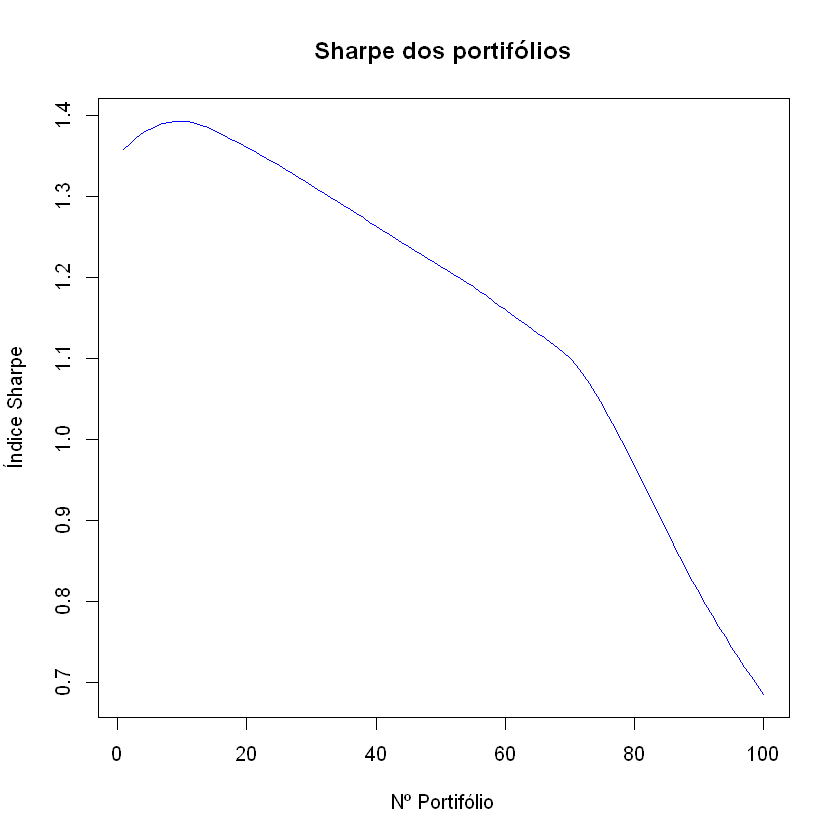

In [80]:
plot(1:npor, (fronteira_eficiente$er - tx_livre_risco)/fronteira_eficiente$sd,
     col = "blue", ylab = "Índice Sharpe", xlab = "Nº Portifólio", type = 'l',
    main = "Sharpe dos portifólios")
abline(h = 0)